# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

## Групповой проект №2. DE: Scraping & API

## Общая информация

__Дата выдачи:__ 21.02.2025

__Защита проекта:__ 05.03.2025

# Код -- запрос: женское украшение (посмотреть % браслетов)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from datetime import datetime, timedelta

## Считываем данные и начальная обработка

### Считывание

In [ ]:
ozon = pd.read_csv("ozon_data_z4.csv")
ozon.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/koltso-zhenskoe-c-fianitami-zoloto-37...,"Кольцо женское c фианитами, золото 375 пробы, ...",KARATOV,True,3827.0,9168.0,−58%,4.9,1587.0,Завтра,OZON
1,/product/ozherele-zhenskoe-tsepochka-s-kulonom...,"Ожерелье женское, цепочка с кулоном, подвеска ...",NaN,False,224.0,259.0,−13%,4.8,865.0,Завтра,OZON
2,/product/flevo-tsepochka-dvoynoe-ozherele-9317...,Flevo Цепочка Двойное ожерелье,NaN,False,235.0,600.0,−60%,4.8,12831.0,Завтра,OZON
3,/product/tsepochka-na-tsepochke-1604478312/?at...,Цепочка На цепочке,NaN,False,171.0,999.0,−82%,4.9,4676.0,Завтра,OZON
4,/product/aclon-kole-880961583/?at=57tw120zmc2q...,ACLON Колье,NaN,False,1441.0,4000.0,−63%,4.5,22.0,7 марта,OZON


In [ ]:
simaland = pd.read_csv('simaland_data_z4.csv')
simaland.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/busy-iz-chernoy-shpineli-5-mm-zamok-i...,"Бусы из Черной Шпинели 5 мм, замок из серебра ...",NaN,False,3176.0,7701.0,−58%,5.0,22.0,7 марта,SL
1,/product/zakolka-krab-10-sht-1843570860/?at=qQ...,Заколка-краб 10 шт.,NaN,False,375.0,1971.0,−80%,4.9,12.0,Завтра,SL
2,/product/nabor-zakolok-dlya-volos-s-zhemchugom...,Набор заколок для волос с жемчугом,NaN,False,285.0,1200.0,−76%,4.9,46.0,Завтра,SL
3,/product/koltso-serebryanoe-zhenskoe-koltso-s-...,"Кольцо серебряное женское, кольцо с фиолетовым...",NaN,False,400.0,1200.0,−66%,4.9,1148.0,6 марта,SL
4,/product/tsepochka-na-sheyu-1552215285/?at=jYt...,Цепочка на шею,NaN,False,273.0,3990.0,−93%,4.8,338.0,6 марта,SL


In [ ]:
wb = pd.read_csv('wb_data_z4.csv')
wb.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/svetyashchiesya-rezinki-pruzhinki-dly...,Светящиеся резинки пружинки для волос набор 3 шт.,NaN,False,171.0,630.0,−72%,4.9,402.0,Завтра,WB
1,/product/roskosh-zolota-kole-shpinel-v-tsvet-t...,РОСКОШЬ ЗОЛОТА Колье шпинель в цвет Топаза / Б...,NaN,False,297.0,990.0,−70%,4.9,1637.0,Завтра,WB
2,/product/sergi-1417819788/?at=ywtA3pNQvs0OLA97...,Серьги,NaN,False,144.0,1049.0,−86%,4.9,24.0,6 марта,WB
3,/product/sergi-koltsa-zheltye-bizhuteriya-1397...,Серьги кольца желтые бижутерия,Стало дешевле,False,87.0,120.0,−27%,5.0,17.0,Завтра,WB
4,/product/missus-fro-komplekt-rezinok-dlya-volo...,Missus Fro Комплект резинок для волос 100 шт.,NaN,False,165.0,499.0,−66%,4.9,3768.0,Завтра,WB


In [ ]:
yandex = pd.read_csv('yandex_market_data_z4.csv')
yandex.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/brelok-igrushka-antistress-dlya-klyuc...,"Брелок игрушка антистресс для ключей, на сумку...",NaN,False,510.0,900.0,−43%,5.0,427.0,Послезавтра,YDX
1,/product/brosh-zhenskaya-bizhuteriya-vishenka-...,"Брошь женская бижутерия ""Вишенка"" украшение на...",NaN,False,263.0,662.0,−60%,4.8,159.0,Завтра,YDX
2,/product/regulyator-razmera-koltsa-1687620357/...,Регулятор размера кольца,NaN,False,172.0,400.0,−57%,4.9,66.0,Завтра,YDX
3,/product/podveska-serebryanaya-925-proby-na-sh...,"Подвеска серебряная 925 пробы на шею женская, ...",Оригинал,False,746.0,5190.0,−85%,5.0,8.0,Завтра,YDX
4,/product/braslet-zhenskiy-eltanika-na-ruku-152...,Браслет женский ELTANIKA на руку,NaN,False,296.0,800.0,−63%,4.9,1180.0,Завтра,YDX


In [ ]:
data_z2 = pd.concat([ozon, simaland, wb, yandex], axis=0, ignore_index=True)
data_z2.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/koltso-zhenskoe-c-fianitami-zoloto-37...,"Кольцо женское c фианитами, золото 375 пробы, ...",KARATOV,True,3827.0,9168.0,−58%,4.9,1587.0,Завтра,OZON
1,/product/ozherele-zhenskoe-tsepochka-s-kulonom...,"Ожерелье женское, цепочка с кулоном, подвеска ...",NaN,False,224.0,259.0,−13%,4.8,865.0,Завтра,OZON
2,/product/flevo-tsepochka-dvoynoe-ozherele-9317...,Flevo Цепочка Двойное ожерелье,NaN,False,235.0,600.0,−60%,4.8,12831.0,Завтра,OZON
3,/product/tsepochka-na-tsepochke-1604478312/?at...,Цепочка На цепочке,NaN,False,171.0,999.0,−82%,4.9,4676.0,Завтра,OZON
4,/product/aclon-kole-880961583/?at=57tw120zmc2q...,ACLON Колье,NaN,False,1441.0,4000.0,−63%,4.5,22.0,7 марта,OZON


**Удалим колонку product_url**

In [ ]:
del data_z2['product_url']

In [ ]:
data_z2.head()

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,"Кольцо женское c фианитами, золото 375 пробы, ...",KARATOV,True,3827.0,9168.0,−58%,4.9,1587.0,Завтра,OZON
1,"Ожерелье женское, цепочка с кулоном, подвеска ...",NaN,False,224.0,259.0,−13%,4.8,865.0,Завтра,OZON
2,Flevo Цепочка Двойное ожерелье,NaN,False,235.0,600.0,−60%,4.8,12831.0,Завтра,OZON
3,Цепочка На цепочке,NaN,False,171.0,999.0,−82%,4.9,4676.0,Завтра,OZON
4,ACLON Колье,NaN,False,1441.0,4000.0,−63%,4.5,22.0,7 марта,OZON


In [ ]:
data_z2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10772 entries, 0 to 10771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   10772 non-null  object 
 1   brand          1733 non-null   object 
 2   is_original    10772 non-null  bool   
 3   final_price    10760 non-null  float64
 4   old_price      10756 non-null  float64
 5   discount       10756 non-null  object 
 6   rating         10642 non-null  float64
 7   reviews_count  10642 non-null  float64
 8   delivery_time  10772 non-null  object 
 9   market         10772 non-null  object 
dtypes: bool(1), float64(4), object(5)
memory usage: 768.1+ KB


In [ ]:
# смотрим размер таблицы
data_z2.shape

(10772, 10)

### Работа с дубликатами

In [ ]:
data_z2.duplicated().sum()

2651

In [ ]:
data_z2 = data_z2.drop_duplicates()

### Работа с пропусками

**Для начала отсортируем нашу ценовую категорию (700 - 2000 рублей)**

In [ ]:
data_z2_start = data_z2.copy()

In [ ]:
data_z2 = data_z2[(data_z2["final_price"] >= 700) & (data_z2["final_price"] <= 2000)]
data_z2.shape[0]

1374

In [ ]:
data_z2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1374 entries, 4 to 10764
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   1374 non-null   object 
 1   brand          371 non-null    object 
 2   is_original    1374 non-null   bool   
 3   final_price    1374 non-null   float64
 4   old_price      1372 non-null   float64
 5   discount       1372 non-null   object 
 6   rating         1334 non-null   float64
 7   reviews_count  1334 non-null   float64
 8   delivery_time  1374 non-null   object 
 9   market         1374 non-null   object 
dtypes: bool(1), float64(4), object(5)
memory usage: 108.7+ KB


**Можно увидеть, что пропуски в большом обьеме есть в колонке -- бренды. Также есть пропуски в колонках old price, final price, old price, еще есть пропуски в rating и reviews counts**

In [ ]:
data_z2.isnull().sum()

,0
product_name,0
brand,1003
is_original,0
final_price,0
old_price,2
discount,2
rating,40
reviews_count,40
delivery_time,0
market,0


**final_price, old_price и discount**


Так как мало пропусков в столцах final_price, old_price и discount (и скорее всего, это одна и та же строка) - можем их убрать. Наиболбшее количество пропусков - в значении бренда, поэтому попробуем заполнить эти пропуски на основе столбца с названием товара, используя проверки на наличие английских слов.

In [ ]:
data_z2 = data_z2.dropna(subset=['final_price','old_price', 'discount'])

**brand**

In [ ]:
def extract_brand(product_name):
    eng_words = re.findall(r'[A-Za-z]+', product_name)
    return ' '.join(eng_words) if eng_words else None

In [ ]:
data_z2.loc[data_z2["brand"].isna(), "brand"] = data_z2["product_name"].apply(extract_brand)
data_z2.head()

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
4,ACLON Колье,ACLON,False,1441.0,4000.0,−63%,4.5,22.0,7 марта,OZON
14,АЛЬКОР Подвеска на шею серебро 925 с бриллиант...,АЛЬКОР,True,1145.0,3800.0,−69%,5.0,22.0,Завтра,OZON
42,АЛЬКОР Подвеска на шею женская серебро 925 с б...,АЛЬКОР,True,716.0,2600.0,−72%,4.8,280.0,Завтра,OZON
60,Комплект украшений Бижутерный сплав,None,False,1212.0,1900.0,−36%,5.0,45.0,Завтра,OZON
102,ALENA KUDRIAVTSEVA JEWELRY Цепочка серебряная ...,ALENA KUDRIAVTSEVA JEWELRY,False,1797.0,5850.0,−69%,4.9,223.0,Завтра,OZON


In [ ]:
data_z2.isnull().sum()

,0
product_name,0
brand,555
is_original,0
final_price,0
old_price,0
discount,0
rating,40
reviews_count,40
delivery_time,0
market,0


После проделанных операция у нас нет больше пропусков в столбцах final_price, old_price и discount, а также сократилось число пропусков в столбце brand

**rating и reviews_count**

заполним пропуски 0, так как если не указывается количество отзывов, значит отзывов слишком мало или их нет

In [ ]:
data_z2['rating'].isna().sum()

40

In [ ]:
data_z2[data_z2['rating'].isna()].head()

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
1786,PANDORA Ожерелье,PANDORA,False,907.0,2415.0,−62%,NaN,NaN,28 марта,OZON
3553,Колье на шею серебро 925 пробы женское позолоч...,Veronika jewelry factory,False,1466.0,3906.0,−62%,NaN,NaN,Послезавтра,SL
3579,"Моносерьга, одиночная серьга золото 585 Сердеч...",UVI jewellery,True,1754.0,7090.0,−75%,NaN,NaN,Послезавтра,SL
3796,"Sirius Колье на леске женское ""Ромб"" черный из...",Sirius,False,750.0,1200.0,−37%,NaN,NaN,8 марта,SL
3861,Krastsvetmet Колье женское серебро 925 Кобра с...,Стало дешевле,False,1951.0,9551.0,−79%,NaN,NaN,Послезавтра,SL


In [ ]:
data_z2['rating'] = data_z2['rating'].fillna(0)
data_z2['reviews_count'] = data_z2['reviews_count'].fillna(0)
data_z2.isna().sum()

,0
product_name,0
brand,555
is_original,0
final_price,0
old_price,0
discount,0
rating,0
reviews_count,0
delivery_time,0
market,0


### Работа с delivery time

In [ ]:
data_z2['delivery_time'].value_counts()

,count
delivery_time,
Завтра,771
6 марта,191
7 марта,128
Послезавтра,127
8 марта,104
9 марта,22
В корзину,9
10 марта,8
24 марта,3


так как парсинг осуществлялся без входа в аккаунт, то "в корзину" означает, что доступна экспресс-доставка в течение сегодняшнего дня, поэтому обозначим это как 0 дней доставки

In [ ]:
start = datetime.now() - timedelta(days=1)
start

datetime.datetime(2025, 3, 3, 7, 57, 25, 576716)

In [ ]:
months = {
    'января': 1, 'февраля': 2, 'марта': 3, 'апреля': 4,
    'мая': 5, 'июня': 6, 'июля': 7, 'августа': 8,
    'сентября': 9, 'октября': 10, 'ноября': 11, 'декабря': 12
}
def delivery(col):
    col = col.lower().strip()
    if 'за' in col:
        return 0
    elif col == 'в корзину':
        return 0
    elif col == 'сегодня':
        return 0
    elif col == 'завтра':
        return 1
    elif col == 'послезавтра':
        return 2
    else:
        day, month = col.split()
        date = datetime(start.year, months[month], int(day))
        if date < start:
            date = date.replace(year=start.year + 1)
        return (date - start).days
data_z2['delivery_time'] = data_z2['delivery_time'].apply(delivery)

In [ ]:
data_z2.head()

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
4,ACLON Колье,ACLON,False,1441.0,4000.0,−63%,4.5,22.0,3,OZON
14,АЛЬКОР Подвеска на шею серебро 925 с бриллиант...,АЛЬКОР,True,1145.0,3800.0,−69%,5.0,22.0,0,OZON
42,АЛЬКОР Подвеска на шею женская серебро 925 с б...,АЛЬКОР,True,716.0,2600.0,−72%,4.8,280.0,0,OZON
60,Комплект украшений Бижутерный сплав,None,False,1212.0,1900.0,−36%,5.0,45.0,0,OZON
102,ALENA KUDRIAVTSEVA JEWELRY Цепочка серебряная ...,ALENA KUDRIAVTSEVA JEWELRY,False,1797.0,5850.0,−69%,4.9,223.0,0,OZON


## Сравнение маркетплейсов

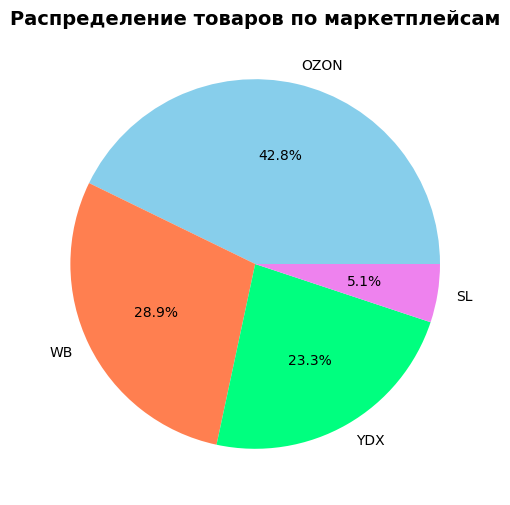

In [ ]:
plt.figure(figsize=(12, 6))

market_counts = data_z2['market'].value_counts()

plt.pie(market_counts, labels=market_counts.index, autopct="%1.1f%%", colors=['skyblue', 'coral', 'springgreen', 'violet'])
plt.title('Распределение товаров по маркетплейсам', fontweight='bold', fontsize=14)
plt.show()

Озон лидирует, также большие доли занимают вб и яндексмаркет

''

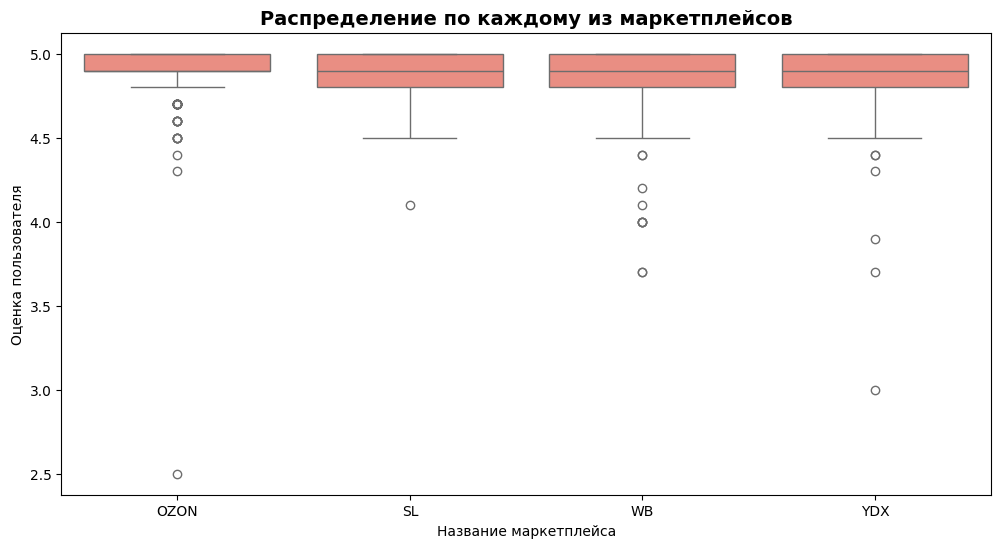

In [ ]:
# бокс плот по маркетплейсам
plt.figure(figsize=(12, 6))
sns.boxplot(x='market', y='rating', data= data_z2[data_z2['rating'] > 0], color='salmon')
plt.title('Распределение по каждому из маркетплейсов', fontweight='bold', fontsize=14)
plt.xlabel('Название маркетплейса')
plt.ylabel('Оценка пользователя')
;

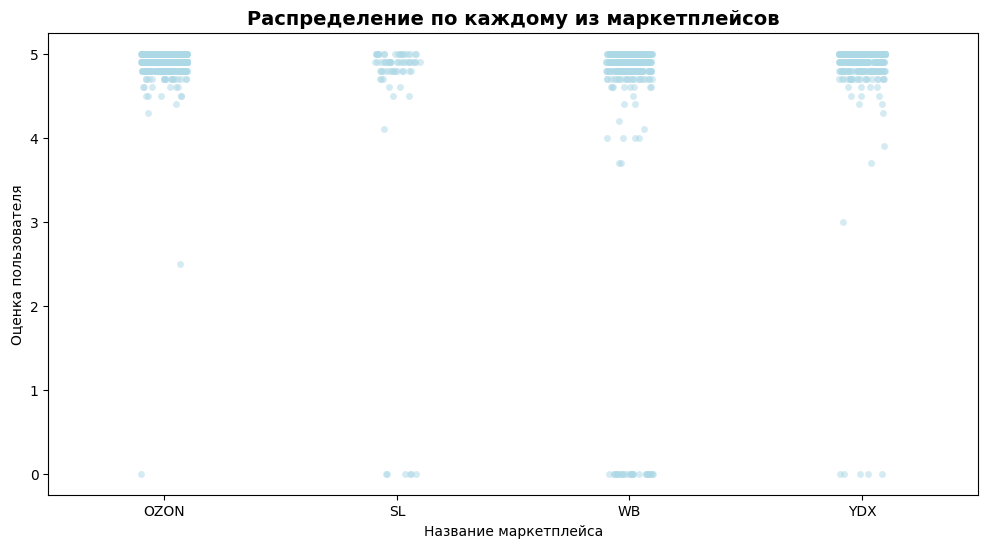

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='market', y='rating', data=data_z2, color='lightblue', alpha=0.5, jitter=True)
plt.title('Распределение по каждому из маркетплейсов', fontweight='bold', fontsize=14)
plt.xlabel('Название маркетплейса')
plt.ylabel('Оценка пользователя')
plt.show()

В основном по каждому из маркетплейсов ставят высокие оценки

## Процент браслетов на рынке

In [ ]:
braslets1 = data_z2_start[data_z2_start['product_name'].apply(lambda x: "браслет" in str(x))]
braslets = data_z2[data_z2['product_name'].apply(lambda x: "браслет" in str(x))]
print('Всего браслетов', braslets1.shape)
print('Браслетов нашей ценовой категории', braslets.shape)

Всего браслетов (250, 10)
Браслетов нашей ценовой категории (53, 10)


In [ ]:
data_z2.shape

(1372, 10)

Выделим основные категории ювелирных изделий

In [ ]:
# функция для определения категории
def define_category(name):
    if 'колье' in name.lower():
        return 'Подвеска'
    elif 'подвеска' in name.lower():
        return 'Подвеска'
    elif 'цепочка' in name.lower():
        return 'Подвеска'
    elif 'браслет' in name.lower():
        return 'Браслет'
    elif 'кольцо' in name.lower():
        return 'Кольцо'
    elif 'серьги' in name.lower():
        return 'Серьги'
    else:
        return 'Другое'

# применение функции к колонке product_name
data_proportion = data_z2
data_proportion['category'] = data_proportion['product_name'].apply(define_category)

data_proportion1 = data_z2_start
data_proportion1['category'] = data_proportion1['product_name'].apply(define_category)

data_proportion.head()

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market,category
4,ACLON Колье,NaN,False,1441.0,4000.0,−63%,4.5,22.0,7 марта,OZON,Подвеска
14,АЛЬКОР Подвеска на шею серебро 925 с бриллиант...,АЛЬКОР,True,1145.0,3800.0,−69%,5.0,22.0,Завтра,OZON,Подвеска
42,АЛЬКОР Подвеска на шею женская серебро 925 с б...,АЛЬКОР,True,716.0,2600.0,−72%,4.8,280.0,Завтра,OZON,Подвеска
60,Комплект украшений Бижутерный сплав,NaN,False,1212.0,1900.0,−36%,5.0,45.0,Завтра,OZON,Другое
102,ALENA KUDRIAVTSEVA JEWELRY Цепочка серебряная ...,NaN,False,1797.0,5850.0,−69%,4.9,223.0,Завтра,OZON,Подвеска


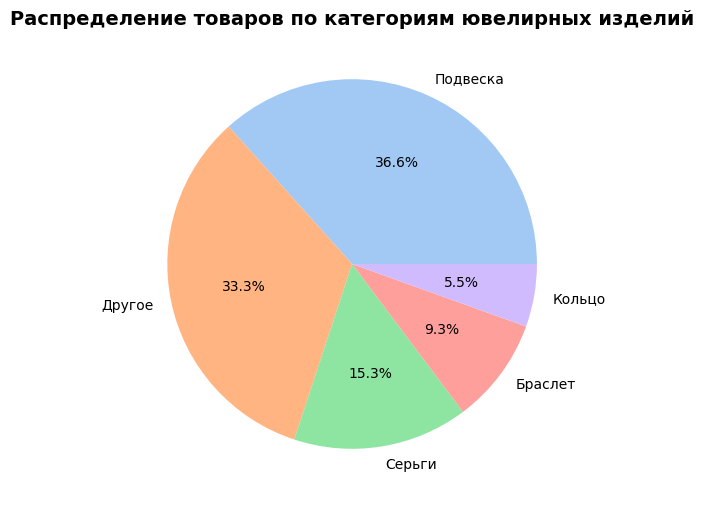

In [ ]:
plt.figure(figsize=(12, 6))

category_counts = data_proportion1['category'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors =sns.color_palette('pastel'))
plt.title('Распределение товаров по категориям ювелирных изделий', fontweight='bold', fontsize=14)
plt.show()

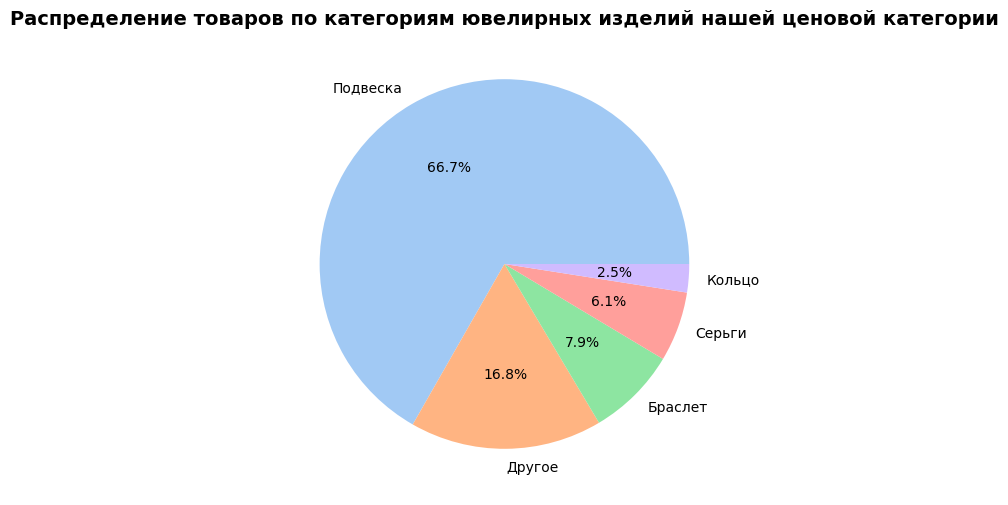

In [ ]:
plt.figure(figsize=(12, 6))

category_counts = data_proportion['category'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors =sns.color_palette('pastel'))
plt.title('Распределение товаров по категориям ювелирных изделий нашей ценовой категории', fontweight='bold', fontsize=14)
plt.show()

**Выводы:** Браслеты и в общей ценовой категории и нашей занимают в среднем 10% доли всех украшений.

In [ ]:
bracelets_df1 = data_proportion1[data_proportion1['category'] == 'Браслет']
bracelets_df = data_proportion[data_proportion['category'] == 'Браслет']
bracelets_df1

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market,category
7,A.Accessorize Браслет парный,NaN,False,247.0,550.0,−55%,4.8,1116.0,Завтра,OZON,Браслет
16,Браслет на руку с мишкой,NaN,False,368.0,579.0,−36%,4.8,2343.0,Завтра,OZON,Браслет
49,Чокер из алмазного стекла с браслетом комплект...,NaN,False,541.0,1600.0,−66%,4.9,993.0,Завтра,OZON,Браслет
88,РОСКОШЬ ЗОЛОТА Браслет бирюза кварц / Браслет ...,NaN,False,410.0,1990.0,−79%,4.8,3120.0,Завтра,OZON,Браслет
100,"Женский браслет на руку, бриллиантовый золотой...",NaN,False,247.0,969.0,−74%,4.7,3328.0,6 марта,OZON,Браслет
...,...,...,...,...,...,...,...,...,...,...,...
10713,Черный кожаный браслет с магнитной застежкой д...,Стало дешевле,False,1023.0,2600.0,−60%,4.9,1204.0,Завтра,YDX,Браслет
10730,Браслет бохо дерево жизни - бежевый,NaN,False,338.0,1500.0,−77%,4.9,241.0,Завтра,YDX,Браслет
10735,Браслет со вставками,Стало дешевле,False,149.0,354.0,−57%,4.8,41.0,4 апреля,YDX,Браслет
10761,Браслет из Малахита шар 8мм/Малахит,NaN,False,353.0,980.0,−63%,4.9,319.0,6 марта,YDX,Браслет


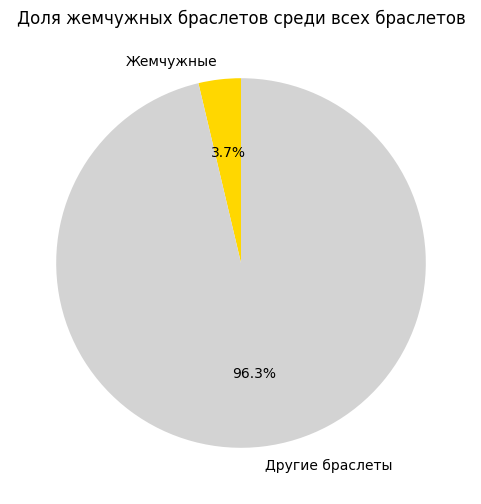

In [ ]:
# 4. Анализ жемчужных браслетов
pearl_bracelets = bracelets_df[bracelets_df['product_name'].str.contains("жемчуг|жемчужный|pearl", case=False, na=False)]

plt.figure(figsize=(6, 6))
plt.pie([len(pearl_bracelets), len(bracelets_df) - len(pearl_bracelets)], labels=['Жемчужные', 'Другие браслеты'],
        autopct='%1.1f%%', colors=['gold', 'lightgrey'], startangle=90)
plt.title("Доля жемчужных браслетов среди всех браслетов")
plt.show()

Жемчужные браслеты, занимающие 3.7% от общего числа браслетов по данному запросу, представляют собой интересную нишу, которая может быть перспективной для развития при удачном запуске продукта